# Projet  - Optimisation de la Qualité des Données de Santé Publique : Développement d'un Processus de Nettoyage et de Prétraitement Robuste"


### Description du Projet :

- L'objectif de notre application est d'améliorer la qualité des données de santé publique en mettant en œuvre un processus avancé de nettoyage et de prétraitement. En utilisant des techniques de pointe en science des données, ce projet aborde les défis spécifiques liés à la collecte, à la gestion et à l'analyse des données de santé.
- Objectifs Principaux :

   - Identification et Gestion des Données Manquantes : Mise en place de stratégies pour traiter efficacement les valeurs manquantes et garantir la complétude des ensembles de données.

   - Détection et Correction des Anomalies : Utilisation d'algorithmes de détection d'anomalies pour identifier les valeurs aberrantes, suivies d'une correction appropriée pour garantir l'intégrité des données.

   - Normalisation des Formats : Harmonisation des formats de données pour garantir la cohérence et la compatibilité à travers l'ensemble des sources de données de santé.

   - Gestion des Duplicités : Développement de méthodes avancées pour détecter et gérer les doublons dans les enregistrements, assurant ainsi l'exactitude des données.

   - Validation des Données : Établissement de protocoles de validation pour garantir la qualité et l'exactitude des données avant leur intégration dans des analyses ou des applications de santé publique.

## Détails spécifiques pour le projet :

### __Scénario :__

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.

--------------------------------------------------------------------------------------------------------

Le jeu de données Open Food Facts est disponible sur le site officiel : https://world.openfoodfacts.org/

--------------------------------------------------------------------------------------------------------

Les variables sont définies à cette adresse : https://world.openfoodfacts.org/data/data-fields.txt

--------------------------------------------------------------------------------------------------------

__Les champs sont séparés en quatre sections :__

 - nom, date de modification, etc.
 - Un ensemble de tags : catégorie du produit, localisation, origine, etc.
 - Les ingrédients composant les produits et leurs additifs éventuels.
 - Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

### __Qu'est ce que le Nutriscore :__

Le Nutri-score est un système d'étiquetage nutritionnel à cinq niveaux, allant de A à E et du vert au rouge, établi en fonction de la valeur nutritionnelle d'un produit alimentaire. Il a pour but de favoriser le choix de produits plus sains d'un point de vue nutritionnel par les consommateurs et ainsi de participer à la lutte contre les maladies cardiovasculaires, l'obésité et le diabète de type 1.

Le score est calculé par un système de points, le score le plus faible étant le meilleur :

--------------------------------------------------------------------------------------------------------

__Eléments défavorables au score :__

apport calorique
teneur en sucre
teneur en graisses saturés
teneur en sel

--------------------------------------------------------------------------------------------------------

__Eléments favorables au score :__

teneur en fruits, légumes, légumineuses et oléagineux
teneur en fibres
teneur en protéines

-----------------------------------------------------------------------------------------------------

### __Qu'est ce que le Label Organic :__

Le label ORGANIC est une certification qui vous garantit qu'un produit est fabriqué avec le moins d'impact possible sur l'environnement tandis que le label BIO assure que les producteurs n'ont pas utilisé de pesticides ou autres produits chimiques pour cultiver leurs produits ou pour nourrir leurs animaux.

--------------------------------------------------------------------------------------------------------

Source : https://www.ams.usda.gov/rules-regulations/organic/labeling

# Mise en place du projet :

## Import des librairies :

In [1]:
import pandas as pd

##  Import du CSV :     Importez le fichier CSV 'fr.openfoodfacts.org.products.csv' dans un dataframe en utilisant pandas.
    Assurez-vous d'utiliser la fonction pd.read_csv avec le séparateur approprié.
    - Données complètes: url = 'https://fr.openfoodfacts.org/data/fr.openfoodfacts.org.products.csv'
    - Portion de 5000 produits sur Google Drive :  https://drive.google.com/file/d/1ttWnCkNDkSz38La3MJgKweH-5FvpaPP2/view?usp=sharing
    - Portion de 100000 produits sur Google Drive: https://drive.google.com/file/d/1--BR-W26czW76MY7BJ_6ycz8pWHg8prH/view?usp=sharing

In [2]:
df=pd.read_csv('/content/Data_Products.csv')


<ipython-input-2-b2e47ae33932>:1: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Data_Products.csv')


## I. Analyse des Valeurs Manquantes

Dans le cadre de notre projet de nettoyage des données pour l'application au service de la santé publique, une attention particulière sera portée à l'identification et à la gestion des valeurs manquantes. Cette analyse approfondie permettra de mettre en place des stratégies efficaces pour garantir la complétude des ensembles de données, assurant ainsi la fiabilité des informations utilisées dans le domaine de la santé publique.

### I.1. Afficher le nombre de lignes et de colonnes du dataframe, ainsi que les 5 premières lignes :

In [3]:
df.shape

(5000, 206)

In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,00000000000000225,http://world-fr.openfoodfacts.org/produit/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1692101569,2023-08-15T12:12:49Z,digg,1.692102e+09,2023-08-15T12:12:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,1.705641e+09,2024-01-19T05:11:35Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1682646029,2023-04-28T01:40:29Z,isabel626,1.682646e+09,2023-04-28T01:40:29Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,1.705640e+09,2024-01-19T04:59:34Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,1.705590e+09,2024-01-18T15:01:48Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I.2. Listes des colonnes :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 206 entries, code to acidity_100g
dtypes: float64(133), int64(2), object(71)
memory usage: 7.9+ MB


### I.3. Fonction de détection des NaN : créer une fonction nommée pourcentage_valeurs_manquantes qui prend le jeu de données en argument et retourne le pourcentage de valeurs manquantes dans le Dataframe

In [6]:
pourcentages_nan = df.isnull().mean() * 100
pourcentages_nan

code                  0.0
url                   0.0
creator               0.0
created_t             0.0
created_datetime      0.0
                    ...  
inositol_100g       100.0
carnitine_100g      100.0
sulphate_100g       100.0
nitrate_100g        100.0
acidity_100g        100.0
Length: 206, dtype: float64

### I.4. Boucle de détection des NaN par colonne :

1.   List item
2.   List item


- Affichez le nombre de NaN pour chaque colonne du dataframe Data en utilisant une boucle et la fonction isnull().

In [7]:
for column in df.columns:
    n_nan = df[column].isnull().sum()
    print(f"Colonne {column} : {n_nan} NaN")

Colonne code : 0 NaN
Colonne url : 0 NaN
Colonne creator : 0 NaN
Colonne created_t : 0 NaN
Colonne created_datetime : 0 NaN
Colonne last_modified_t : 0 NaN
Colonne last_modified_datetime : 0 NaN
Colonne last_modified_by : 385 NaN
Colonne last_updated_t : 3 NaN
Colonne last_updated_datetime : 3 NaN
Colonne product_name : 499 NaN
Colonne abbreviated_product_name : 5000 NaN
Colonne generic_name : 4907 NaN
Colonne quantity : 4097 NaN
Colonne packaging : 4662 NaN
Colonne packaging_tags : 4662 NaN
Colonne packaging_fr : 4662 NaN
Colonne packaging_text : 4990 NaN
Colonne brands : 2732 NaN
Colonne brands_tags : 2732 NaN
Colonne categories : 3502 NaN
Colonne categories_tags : 3502 NaN
Colonne categories_fr : 3502 NaN
Colonne origins : 4916 NaN
Colonne origins_tags : 4917 NaN
Colonne origins_fr : 4917 NaN
Colonne manufacturing_places : 4887 NaN
Colonne manufacturing_places_tags : 4887 NaN
Colonne labels : 4006 NaN
Colonne labels_tags : 4006 NaN
Colonne labels_fr : 4006 NaN
Colonne emb_codes : 49

### I.5     Pourcentage de NaN par colonne :

1.   List item

1.   List item
2.   List item


2.   List item



- Calculez et affichez le pourcentage de valeurs manquantes pour chaque colonne du dataframe Data, trié par ordre croissant. Utilisez la fonction isna(), sum(), et assurez-vous de trier les résultats avant le calcul du pourcentage.

In [8]:
for column in df.columns:
    n_nan = df[column].isnull().sum()
    percent_nan = (n_nan / len(df)) * 100
    print(f"Colonne {column} : {percent_nan:.2f}% de NaN")

Colonne code : 0.00% de NaN
Colonne url : 0.00% de NaN
Colonne creator : 0.00% de NaN
Colonne created_t : 0.00% de NaN
Colonne created_datetime : 0.00% de NaN
Colonne last_modified_t : 0.00% de NaN
Colonne last_modified_datetime : 0.00% de NaN
Colonne last_modified_by : 7.70% de NaN
Colonne last_updated_t : 0.06% de NaN
Colonne last_updated_datetime : 0.06% de NaN
Colonne product_name : 9.98% de NaN
Colonne abbreviated_product_name : 100.00% de NaN
Colonne generic_name : 98.14% de NaN
Colonne quantity : 81.94% de NaN
Colonne packaging : 93.24% de NaN
Colonne packaging_tags : 93.24% de NaN
Colonne packaging_fr : 93.24% de NaN
Colonne packaging_text : 99.80% de NaN
Colonne brands : 54.64% de NaN
Colonne brands_tags : 54.64% de NaN
Colonne categories : 70.04% de NaN
Colonne categories_tags : 70.04% de NaN
Colonne categories_fr : 70.04% de NaN
Colonne origins : 98.32% de NaN
Colonne origins_tags : 98.34% de NaN
Colonne origins_fr : 98.34% de NaN
Colonne manufacturing_places : 97.74% de NaN

### I.6 Précision des NaN sur mon DF :
- Créez une représentation graphique sous forme de barres pour illustrer les pourcentages de données manquantes par colonne dans le DataFrame. Utilisez le style "darkgrid" de Seaborn, ajustez la taille de la figure à (20, 23), et assurez-vous d'inclure un titre explicite de taille 30

<ipython-input-9-0055a6641c26>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=pourcentages_nan.index, y=pourcentages_nan.values, palette="viridis")


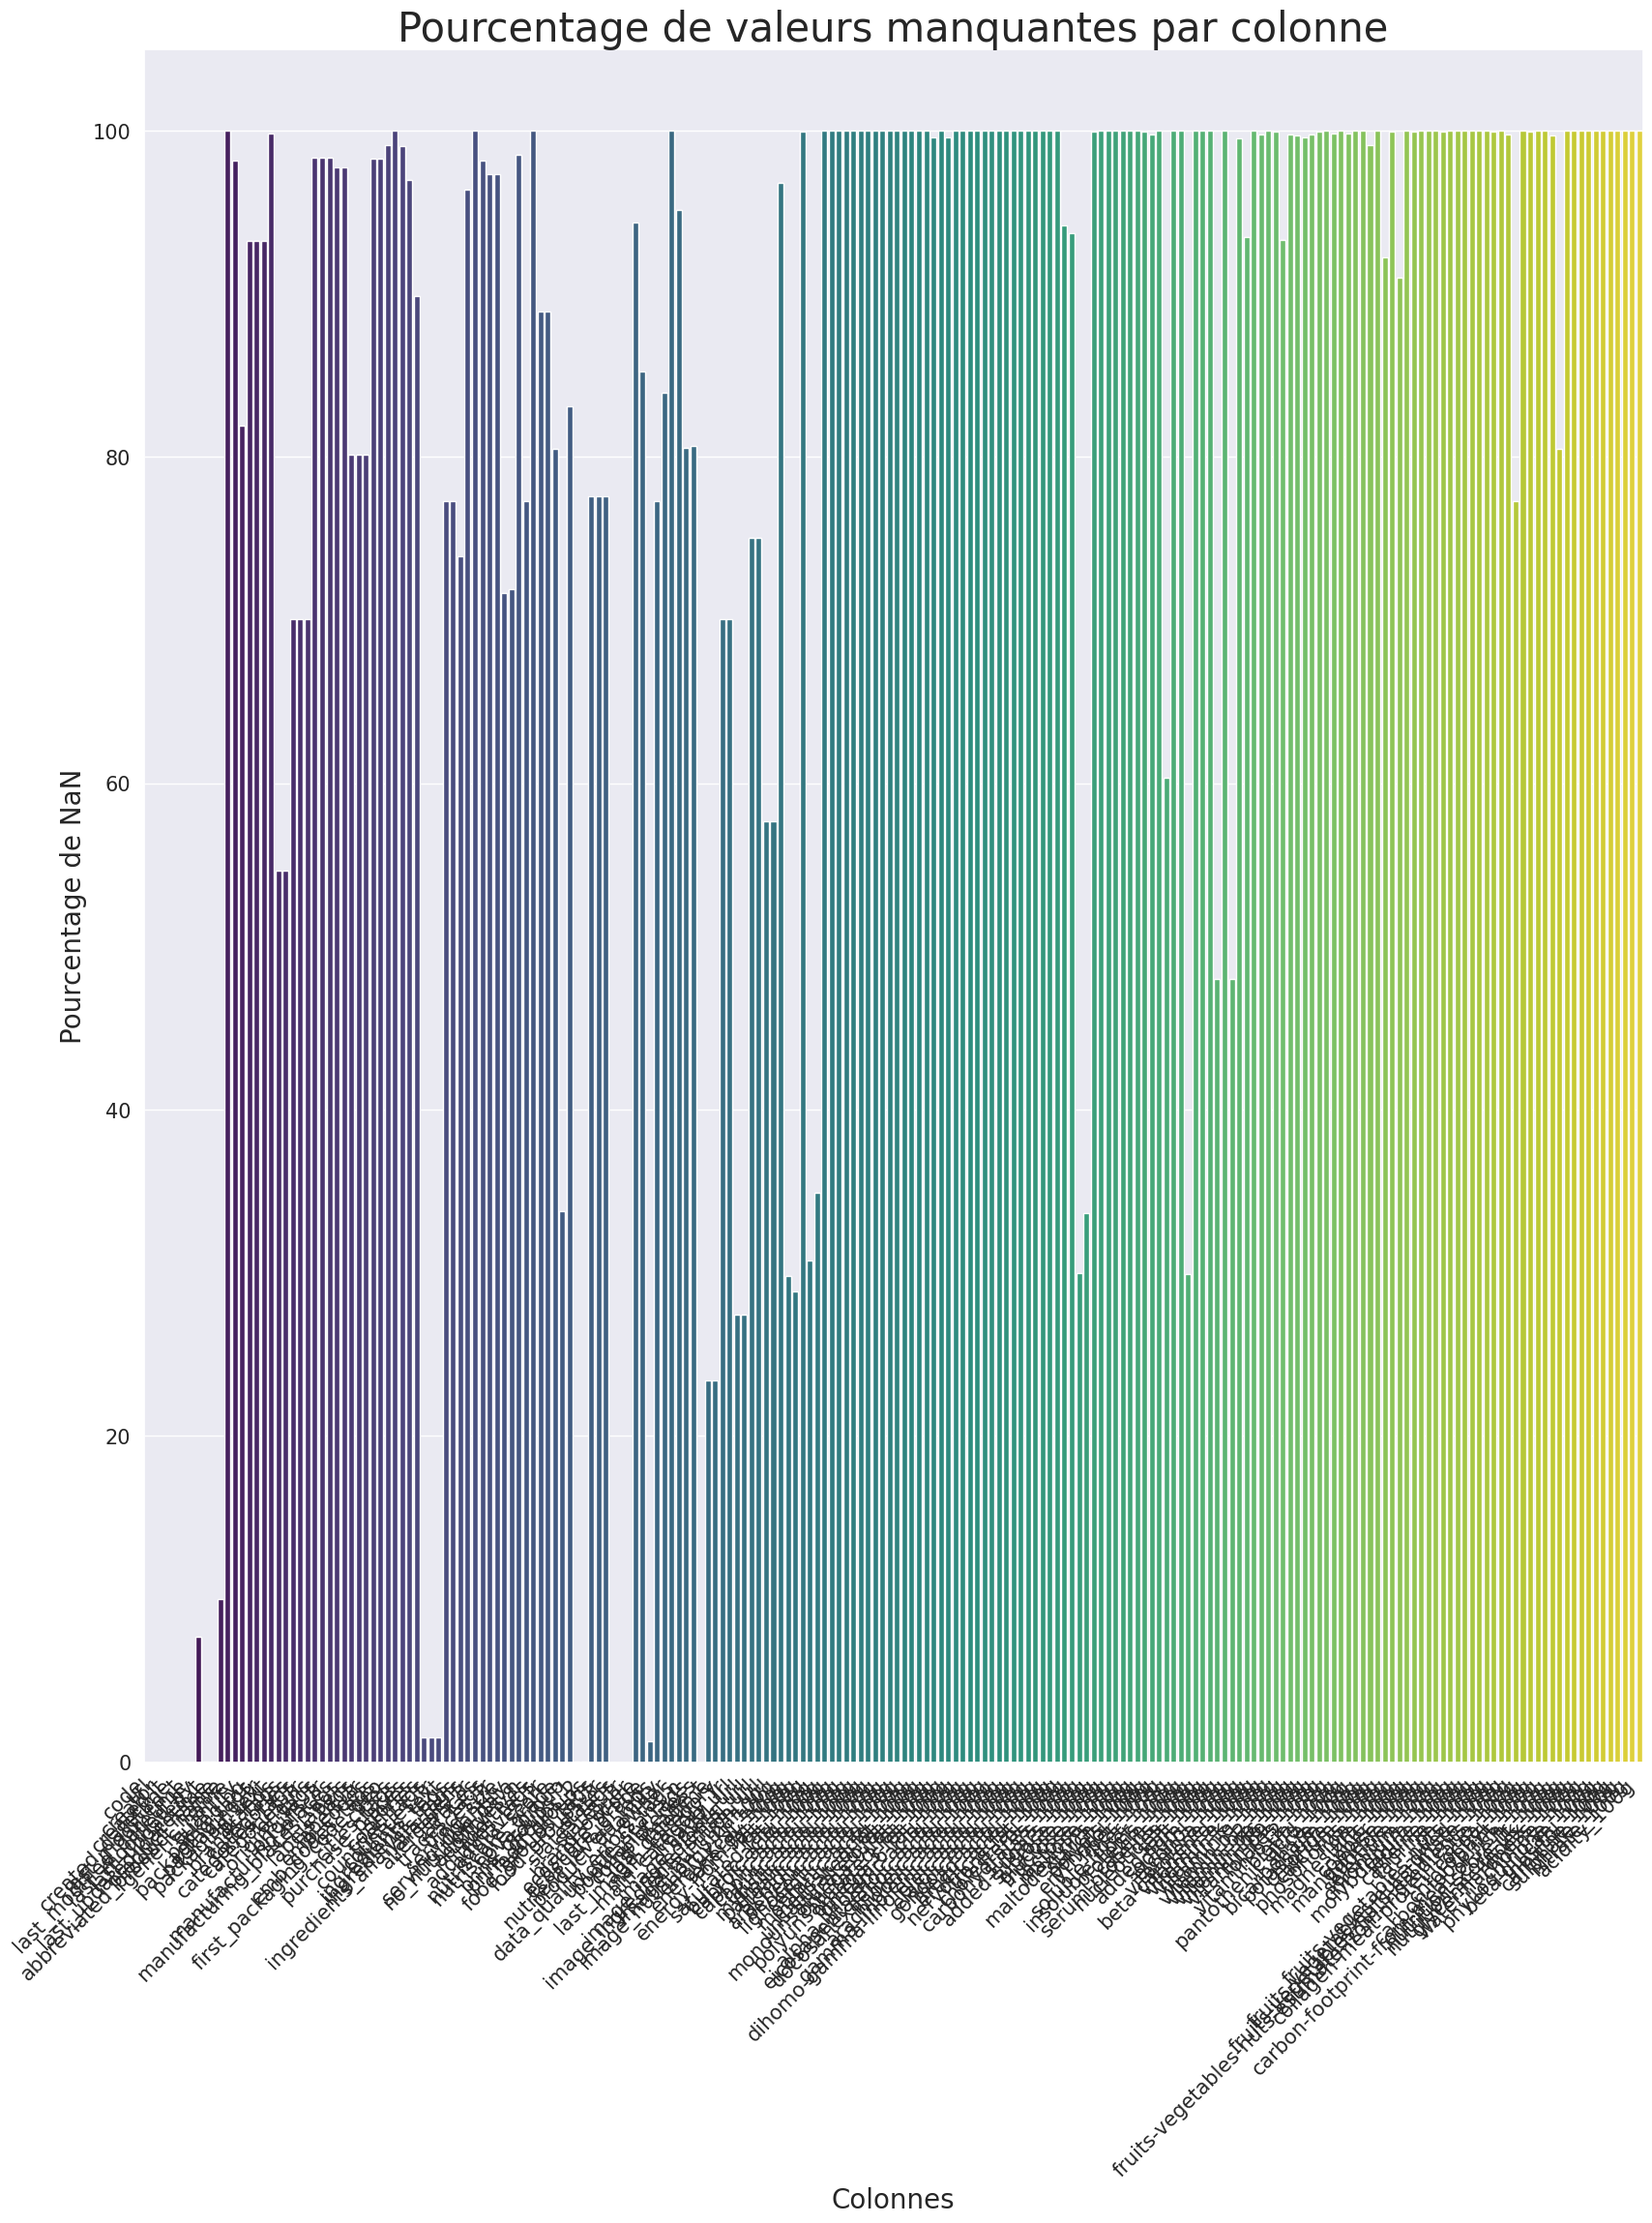

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(20, 23))

# Création du graphique à barres
ax = sns.barplot(x=pourcentages_nan.index, y=pourcentages_nan.values, palette="viridis")

# Personnalisation du graphique
plt.title('Pourcentage de valeurs manquantes par colonne', fontsize=30)
plt.xlabel('Colonnes', fontsize=20)
plt.ylabel('Pourcentage de NaN', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)

# Affichage du graphique
plt.show()

### I.7  Affichage des colonnes avec des colonnes qui ont

*   List item
*   List item

moins de 40% de NaN

<ipython-input-10-e15e5857a98d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=pourcentages_nan_filtre.index, y=pourcentages_nan_filtre.values, palette="viridis")


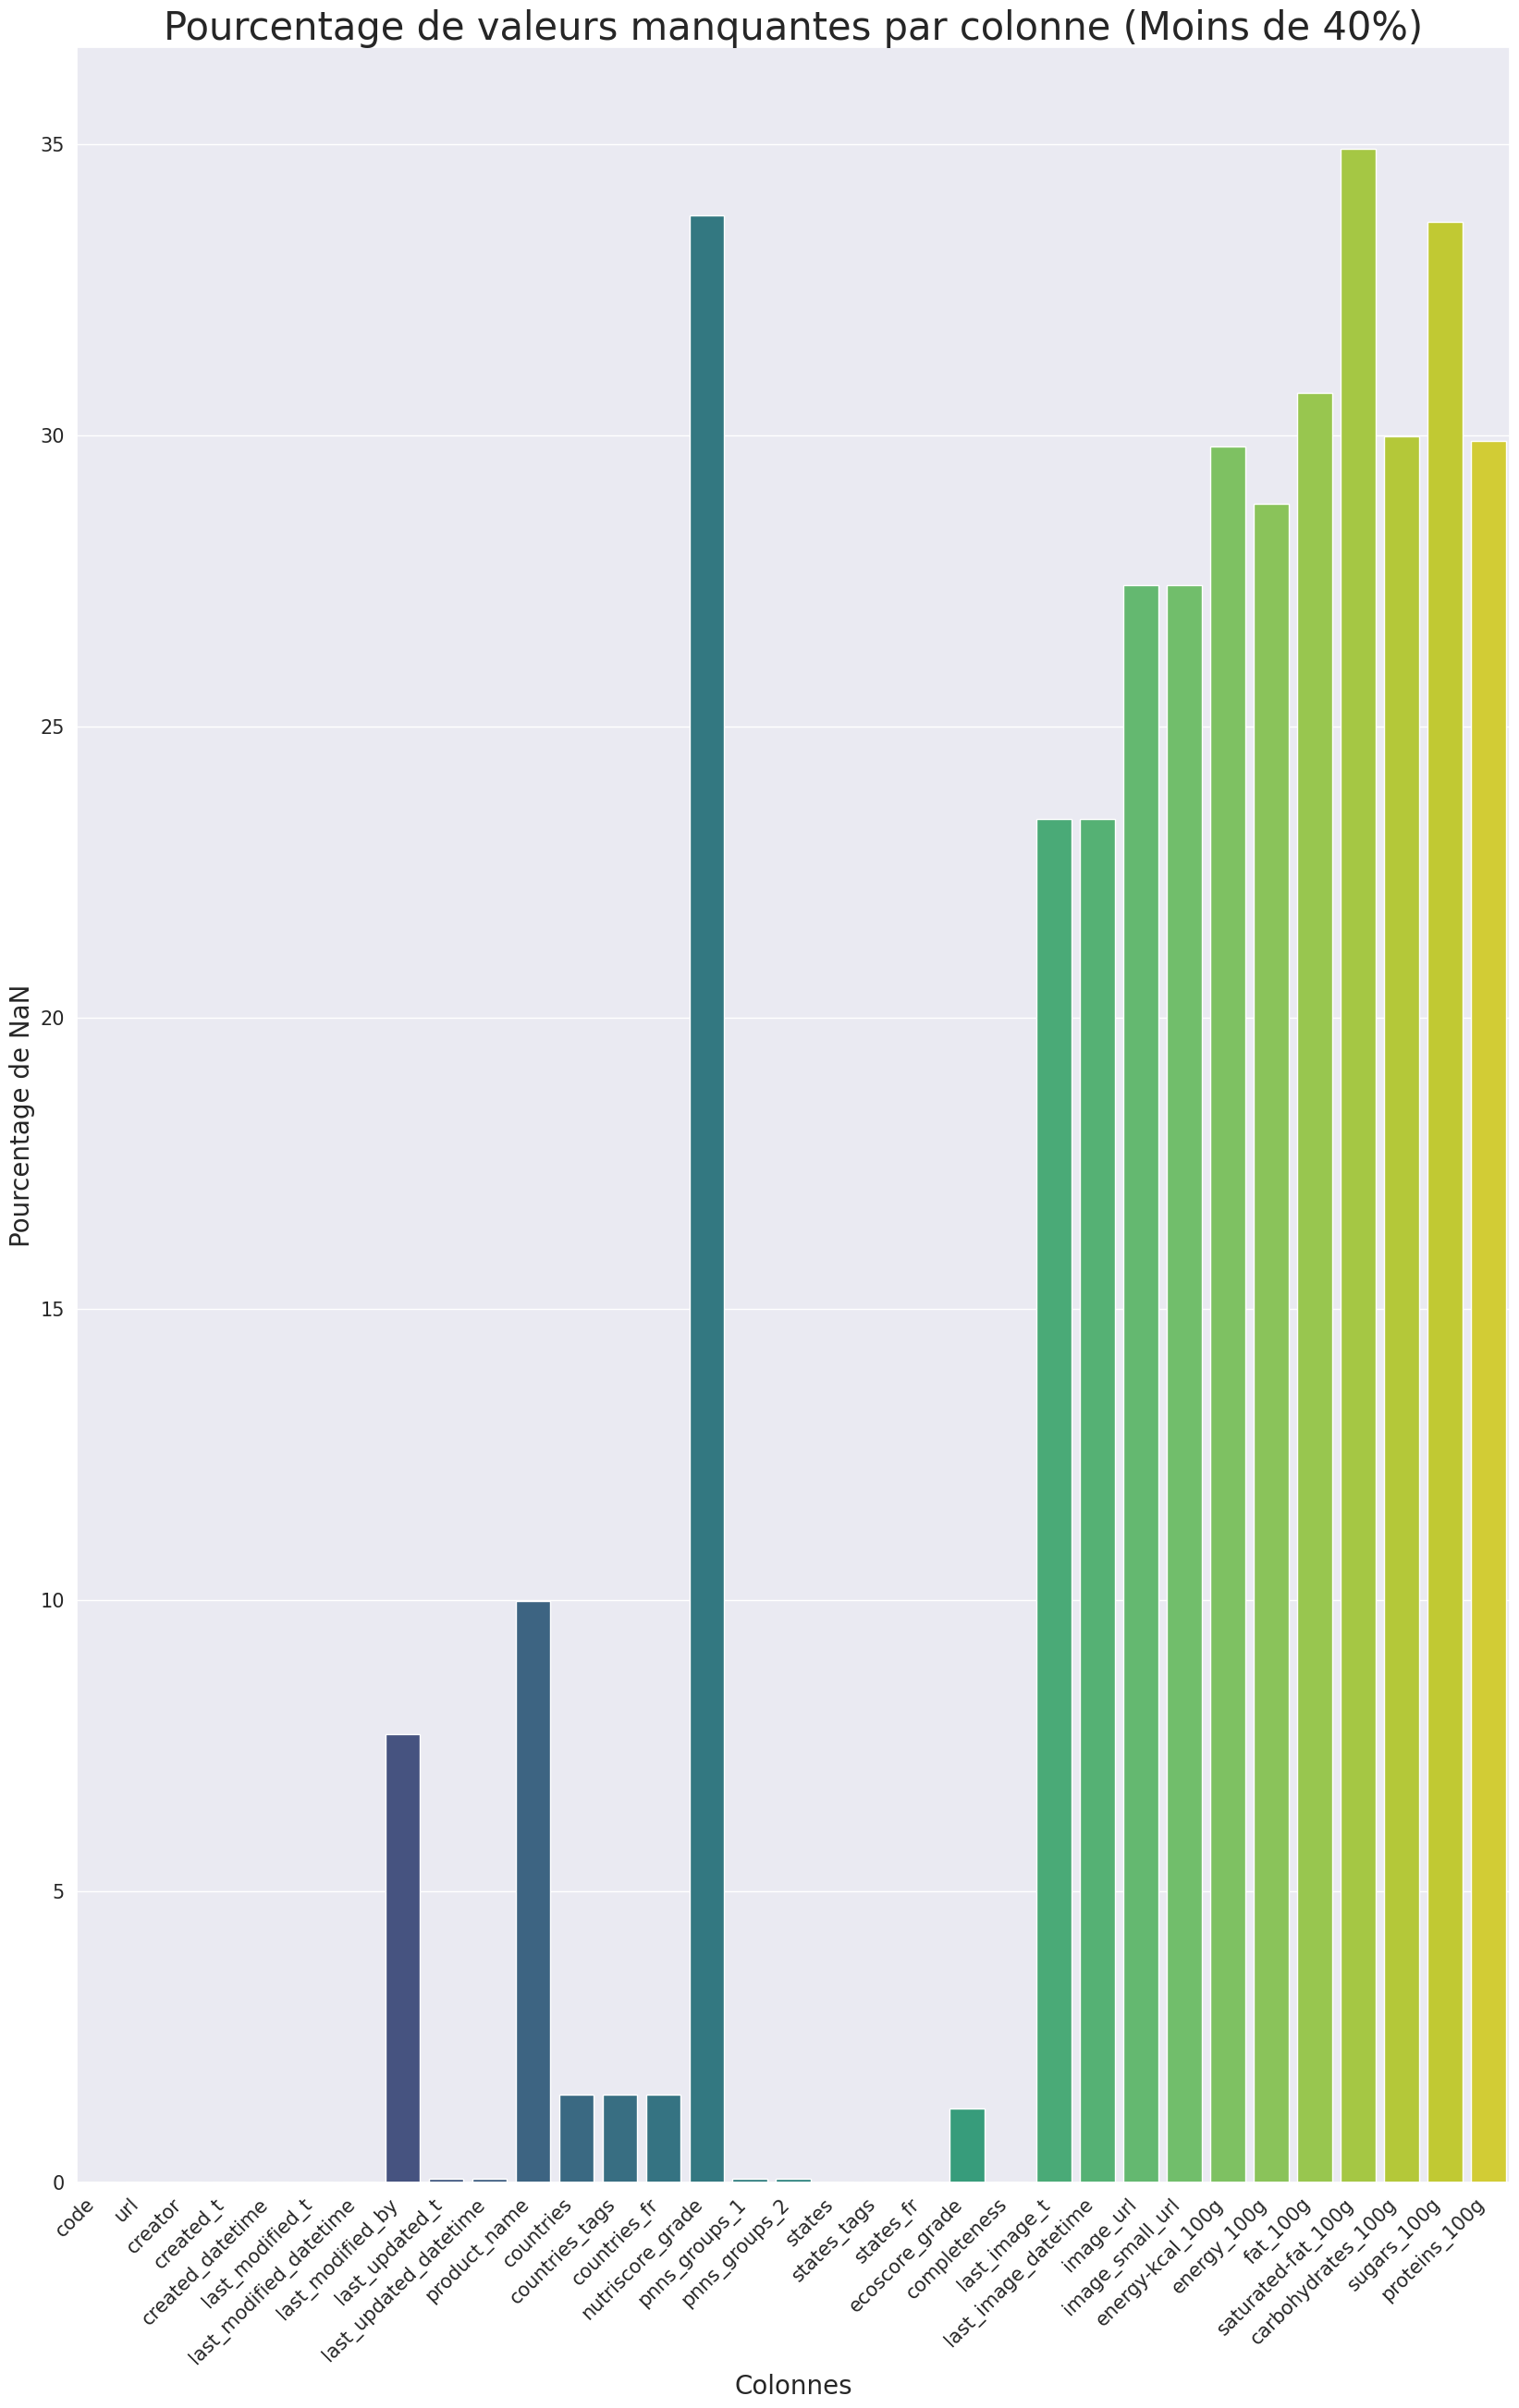

In [10]:
# Filtrage des colonnes ayant moins de 40% de valeurs manquantes
pourcentages_nan_filtre = pourcentages_nan[pourcentages_nan < 40]

# Paramètres de style et de taille de la figure
sns.set(style="darkgrid")
plt.figure(figsize=(20, 30))

# Création du graphique à barres
ax = sns.barplot(x=pourcentages_nan_filtre.index, y=pourcentages_nan_filtre.values, palette="viridis")

# Personnalisation du graphique
plt.title('Pourcentage de valeurs manquantes par colonne (Moins de 40%)', fontsize=30)
plt.xlabel('Colonnes', fontsize=20)
plt.ylabel('Pourcentage de NaN', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)

# Affichage du graphique
plt.show()

### I.8 Affichage des colonnes avec des colonnes qui ont plus de 40 % de NaN

<ipython-input-11-b062e37e8760>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=pourcentages_nan_filtre.index, y=pourcentages_nan_filtre.values, palette="viridis")


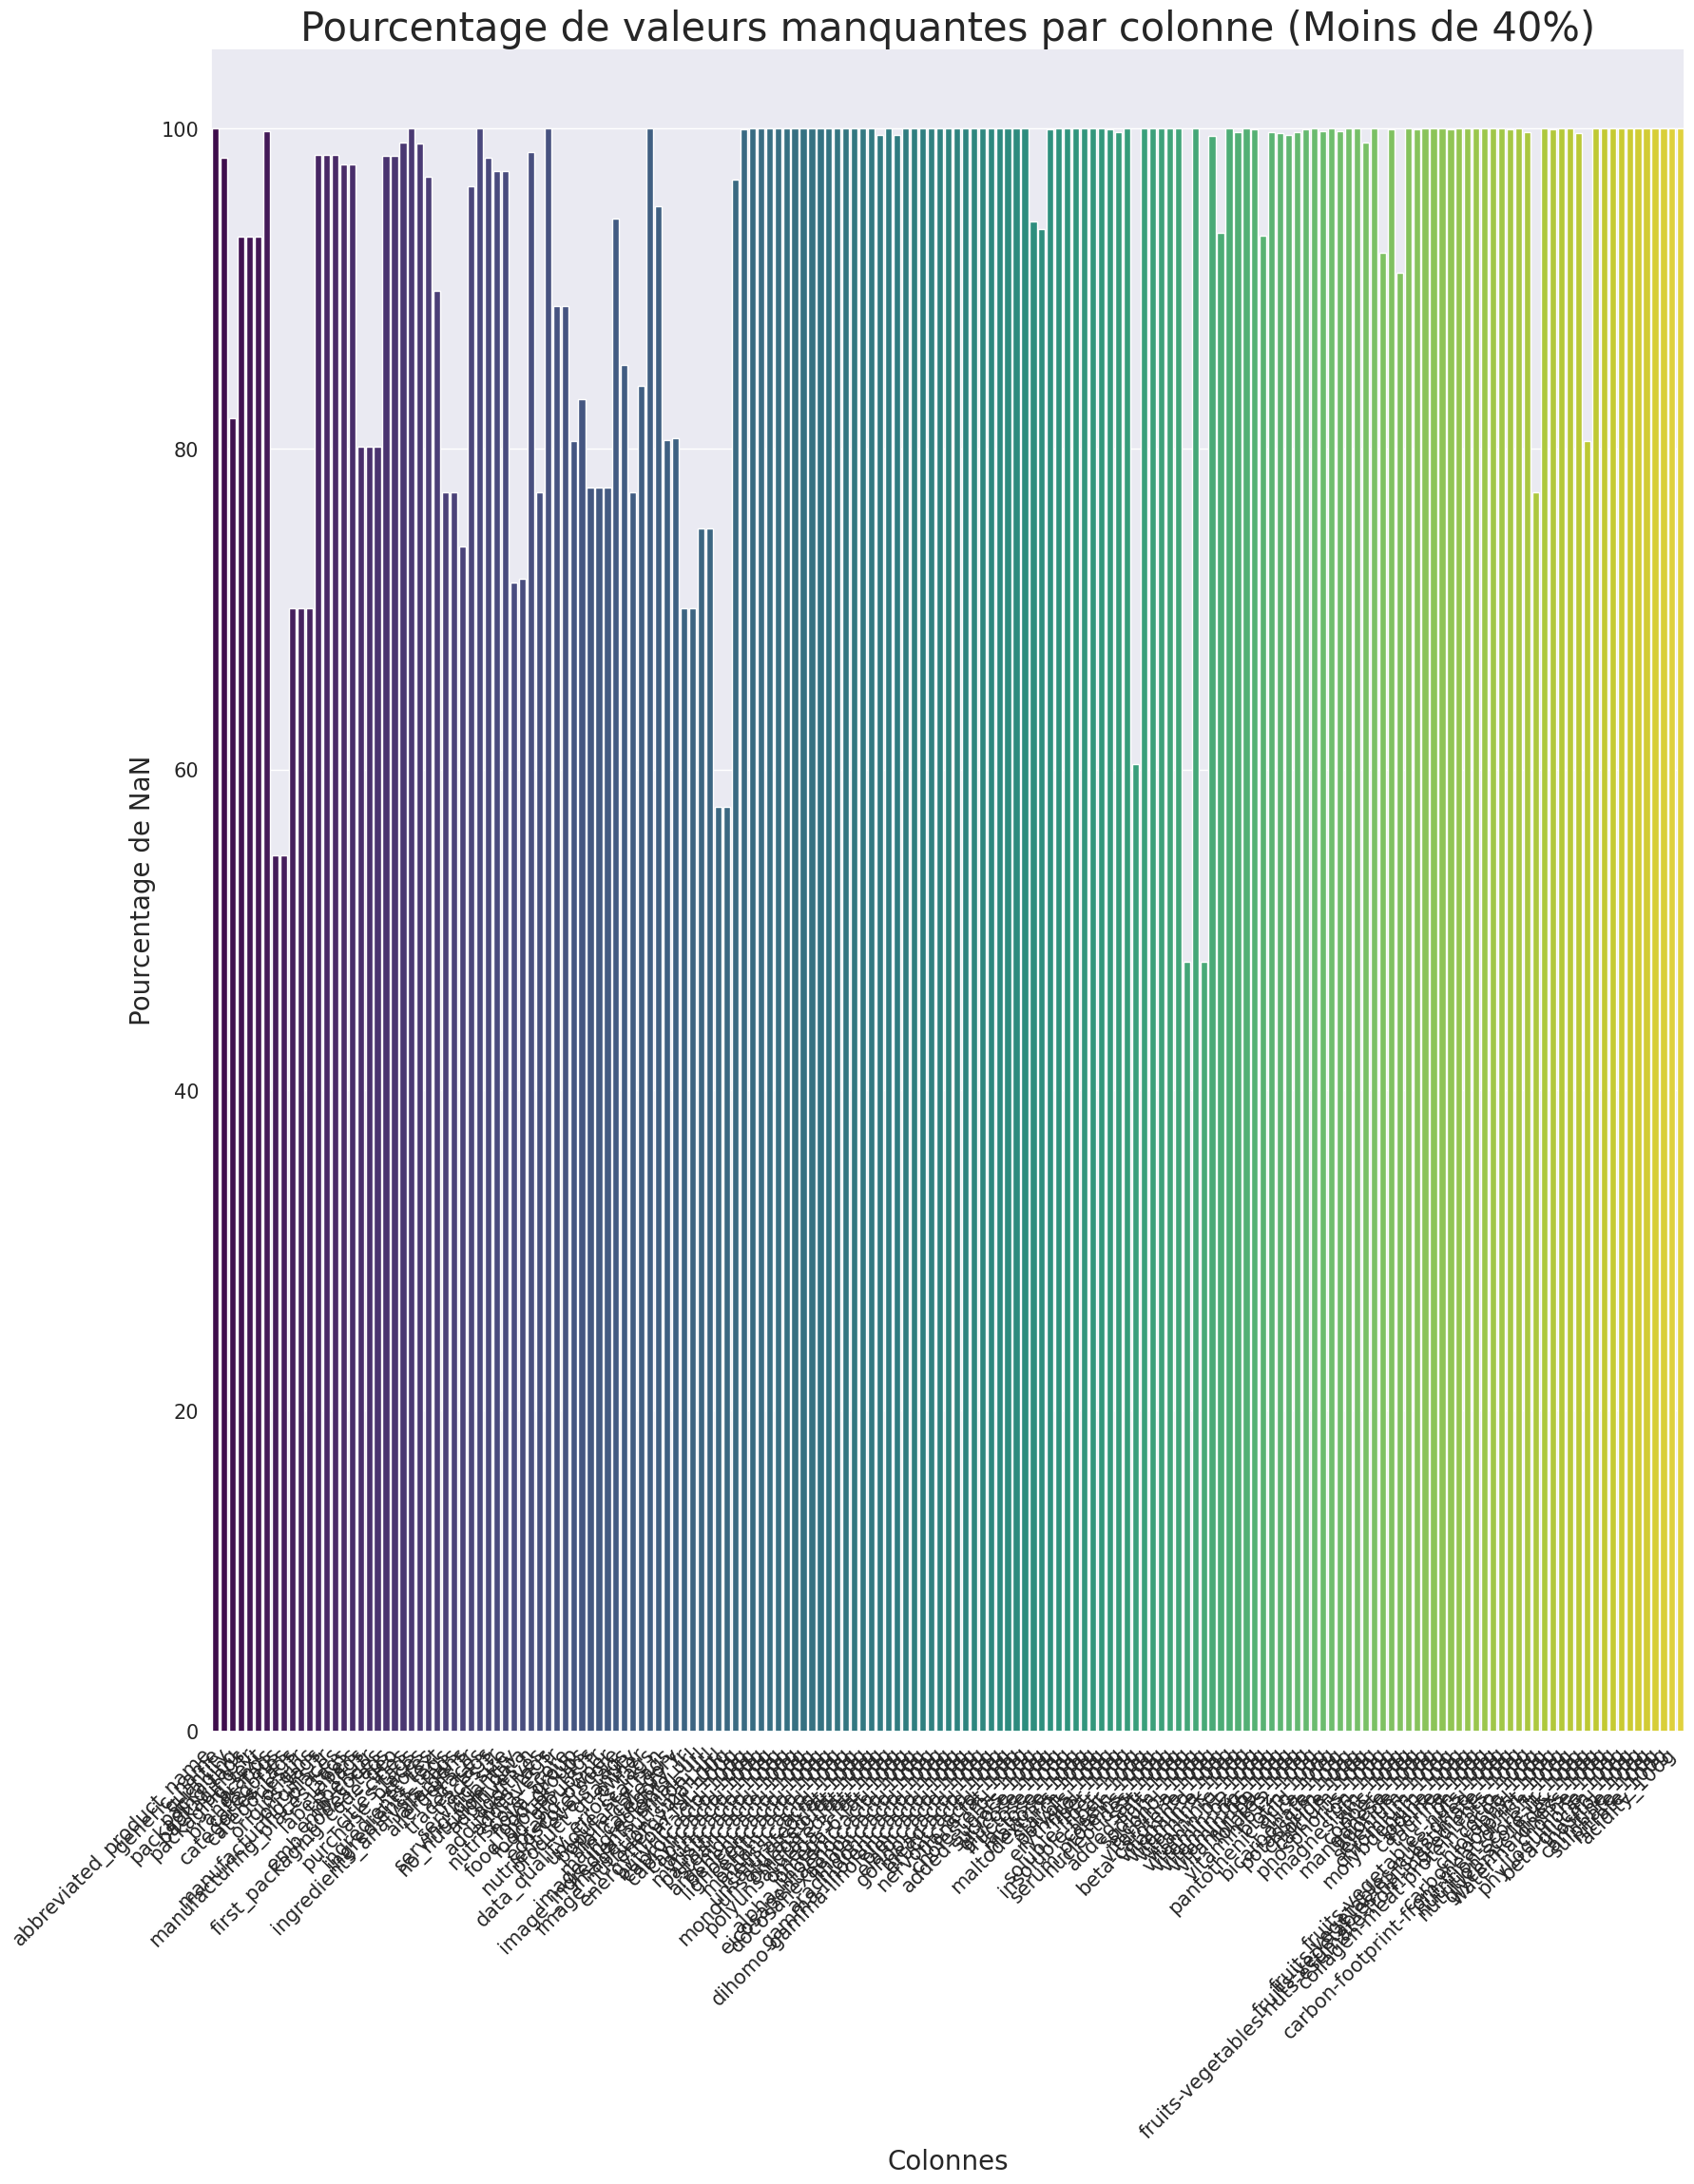

In [11]:
# Filtrage des colonnes ayant moins de 40% de valeurs manquantes
pourcentages_nan_filtre = pourcentages_nan[pourcentages_nan > 40]

# Paramètres de style et de taille de la figure
sns.set(style="darkgrid")
plt.figure(figsize=(20, 23))

# Création du graphique à barres
ax = sns.barplot(x=pourcentages_nan_filtre.index, y=pourcentages_nan_filtre.values, palette="viridis")

# Personnalisation du graphique
plt.title('Pourcentage de valeurs manquantes par colonne (Moins de 40%)', fontsize=30)
plt.xlabel('Colonnes', fontsize=20)
plt.ylabel('Pourcentage de NaN', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)

# Affichage du graphique
plt.show()

### I.9. Précision sur le df pour les colonne inférieur à 40% :
- Créer un graphique en barres affichant les pourcentages de données manquantes par colonne dans le DataFrame, mais cette fois, en se limitant aux colonnes avec un pourcentage inférieur à 40%. Assurez-vous de définir le style de Seaborn sur "darkgrid", de fixer la taille de la figure à (20, 30), et de mettre en évidence l'axe des ordonnées avec le pourcentage de données manquantes.

## II. Suppression d'une partie du DF pour faciliter la visualisation :

### II.1 Contrôle des doublons :
Détecter  et afficher les colonnes dupliquées dans le DataFrame

In [12]:
# Détection des colonnes dupliquées
colonnes_dupliquees = df.columns[df.columns.duplicated()]

# Affichage des colonnes dupliquées
print("Colonnes dupliquées :", colonnes_dupliquees.to_list())

Colonnes dupliquées : []


### II.2 Suppression des données manquantes à plus de 40% :

- Avec 40% de valeurs manquantes, nous devons donc éliminer les données pour lequel il sera trés difficile d'avoir des infos..

In [19]:
# Suppression des colonnes avec plus de 40% de valeurs manquantes
seuil = len(df) * 0.6  # 60% de données non manquantes
df_filtre = df.dropna(thresh=seuil, axis=1)



### II.3 Affichage  des colonnes restante :
- Après avoir supprimé les colonnes présentant plus de 40% de valeurs manquantes, afficher les colonnes restantes dans le DataFrame?

In [20]:
# Affichage du DataFrame filtré
print("DataFrame après suppression des colonnes avec plus de 40% de valeurs manquantes :")
df_filtre.head()

DataFrame après suppression des colonnes avec plus de 40% de valeurs manquantes :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,last_image_datetime,image_url,image_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,00000000000000225,http://world-fr.openfoodfacts.org/produit/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1692101569,2023-08-15T12:12:49Z,digg,1.692102e+09,2023-08-15T12:12:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,1.705641e+09,2024-01-19T05:11:35Z,...,2022-07-04T15:30:13Z,NaN,NaN,165.0,690.0,2.0,2.00,65.0,12.6,1.5
2,00000000000003429145,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1682646029,2023-04-28T01:40:29Z,isabel626,1.682646e+09,2023-04-28T01:40:29Z,...,2021-09-01T08:11:52Z,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,1.4,0.90,9.8,9.8,2.7
3,00000000000026772226,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,1.705640e+09,2024-01-19T04:59:34Z,...,2022-06-03T09:58:34Z,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,57.0,238.0,0.2,0.10,3.9,3.9,10.0
4,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,1.705590e+09,2024-01-18T15:01:48Z,...,2018-06-15T10:38:07Z,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,375.0,1569.0,7.0,3.08,70.1,15.0,7.8


### II.4 Suppression des colonnes non désirés :
- Veuillez supprimer du DataFrame les colonnes suivantes : 'code', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'brands_tags', 'countries', 'countries_tags', 'ingredients_text', 'serving_size', 'additives', 'ingredients_that_may_be_from_palm_oil_n', 'states', 'states_tags', 'states_fr', 'saturated-fat_100g', 'carbohydrates_100g', 'sodium_100g', 'nutrition-score-uk_100g'.

In [21]:
import pandas as pd

# Suppression des colonnes spécifiées
colonnes_a_supprimer = ['code', 'creator', 'created_t', 'created_datetime',
                        'last_modified_t', 'last_modified_datetime', 'brands_tags',
                        'countries', 'countries_tags', 'ingredients_text',
                        'serving_size', 'additives', 'ingredients_that_may_be_from_palm_oil_n',
                        'states', 'states_tags', 'states_fr', 'saturated-fat_100g',
                        'carbohydrates_100g', 'sodium_100g', 'nutrition-score-uk_100g']


# Vérification de l'existence des colonnes à supprimer
colonnes_existantes = df.columns.tolist()
colonnes_a_supprimer_reelles = [col for col in colonnes_a_supprimer if col in colonnes_existantes]

# Suppression des colonnes réellement existantes
df_filtre = df.drop(columns=colonnes_a_supprimer_reelles, errors='ignore')

# Affichage du DataFrame filtré
print("DataFrame après suppression des colonnes spécifiées :")
print(df_filtre.shape)


DataFrame après suppression des colonnes spécifiées :
(5000, 187)


### II.5 Affichage de Dataframe aprés modification

In [ ]:
df.

### II.6 Affichage de la liste des colonnes restantes

## III. Suppression des lignes avec trop de données manquantes :

### III.1 Afficher le type de données associé à chaque colonne

### III.2 Calculer le pourcentage de valeurs manquantes:
- Pour les colonnes de type float64 dans le DataFrame Data, puis pour les colonnes de type object, et enfin, pour l'ensemble des colonnes du DataFrame."

### III.3 Detection des outliers :
- Vérifiation des données Outliers >100g ou < 0 en utilisant uniquement les données de type float64.
- En ce qui concerne le Nutriscore, il peut être positif comme négatif. utiliser une fonction d'analyse statistique rapide.


### III.4  Avec les données ci dessus, on va créer une fonction pour épurer avec des données réelles.
- energy_100g: La quantité d'énergie du produit pour 100 grammes.[0c,900c]
- fat_100g: La quantité de matières grasses du produit pour 100 grammes.[0g,99g]
- sugars_100g: La quantité de sucres du produit pour 100 grammes.[0g,99g]
- fiber_100g: La quantité de fibres du produit pour 100 grammes.[0g,16g]
- proteins_100g: La quantité de protéines du produit pour 100 grammes.[0g,87.6g]
- salt_100g: La quantité de sel du produit pour 100 grammes.[0g,99g]
- nutrition-score-fr_100g: Le score nutritionnel du produit pour 100 grammes en France.[0g,99g]

### III.5  Donner un Résumé statistique récapitulatifs des colonnes numériques après l'élimination des valeurs aberrantes dans le DataFrame modifié.

### III.6 Détection et suppression de produit sans référence (sans nom) :

In [ ]:
# calculer le nombre de produit sans référence

In [ ]:
# Suppression des lignes de produit sans nom:

### III.7  Détection et suppression des additifs non communiqués :
- Il s'agit de trouver dans le jeu de données les produits alimentaires pour lesquels les informations sur les additifs ne sont pas fournies.

In [ ]:
# Calculer Le nombre de produits sans référence

In [ ]:
# Suppression des additifs non communiqués

### III.8 Détection et suppression des marques sans référence :

In [ ]:
# Calculer Le nombre de marques sans référence

In [ ]:
# Suppression des marques sans référence

### III.9 Affichage de données aprés modification

### III 10. Vérification avec pourcentage des NaN de chaque type   avant Imputation :